In [44]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
df=pd.read_csv("apneaset.csv")
df 

,Patinet_ID,EEG_Signal_Amplitude,EEG_Delta_band,EEG_Theta_band,EEG_Alpha_band,EEG_Beta_band,Hair_Phenotype,heart_rate,skin_conductance,skin_temperature,cortisol_level,Systolic_BP,Diastolic_BP,apnea_Severity
0,180203,56,2.4786,5.5748,11.7319,23.9909,Curly_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Medium_Severity
1,152268,97,3.2531,6.4658,13.1411,28.3962,Curly_hair,High_PulseRate,Low_Conductance,Fever,Below_AverageCL,Range3_LowSystolic,LowDiSystolic,Low_Severity
2,157399,83,3.6325,6.0053,13.6766,26.0487,Wavy_hair,High_PulseRate,Low_Conductance,Fever,Below_AverageCL,Range3_LowSystolic,LowDiSystolic,Low_Severity
3,131849,58,2.9477,5.5462,10.3739,22.0865,Straight_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Medium_Severity
4,164593,22,1.9366,4.3574,8.9079,18.7077,Curly_hair,Low_PulseRate,High_Conductance,Low_Temperature,Above_AverageCL,Range1_LowSystolic,VerylowDiSystolic,High_Severity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,134065,95,3.0788,6.7874,14.5136,26.9154,No_hair,High_PulseRate,Low_Conductance,Fever,Below_AverageCL,Range3_LowSystolic,LowDiSystolic,Medium_Severity
671,182597,23,1.2767,4.9695,8.8617,18.6980,No_hair,Low_PulseRate,High_Conductance,Low_Temperature,Above_AverageCL,Range1_LowSystolic,VerylowDiSystolic,High_Severity
672,156972,36,2.3799,5.3240,11.5026,23.6280,Wavy_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Low_Severity
673,172428,59,2.6147,5.3841,11.1521,20.8031,Straight_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Medium_Severity


In [25]:
df["apnea_Severity"] = df["apnea_Severity"].map(
    {'High_Severity': 2, 'Medium_Severity': 1, 'Low_Severity': 0})
df["heart_rate"] = df["heart_rate"].map(
    {'High_PulseRate': 2, 'Medium_PulseRate': 1, 'Low_PulseRate': 0})
df["skin_conductance"] = df["skin_conductance"].map(
    {'High_Conductance': 2, 'Normal_Conductance': 1, 'Low_Conductance': 0})
df["skin_temperature"] = df["skin_temperature"].map(
    {'Low_Temperature': 2, 'Normal_Temperature': 1, 'Fever': 0})
df["cortisol_level"] = df["cortisol_level"].map(
    {'Above_AverageCL': 2, 'AverageCL': 1, 'Below_AverageCL': 0})
df["Systolic_BP"] = df["Systolic_BP"].map(
    {'Range1_LowSystolic': 2, 'Range2_LowSystolic': 1, 'Range3_LowSystolic': 0})
df["Diastolic_BP"] = df["Diastolic_BP"].map(
    {'VerylowDiSystolic': 2, 'NormalDiSystolic': 1, 'LowDiSystolic': 0})

In [26]:
df

,Patinet_ID,EEG_Signal_Amplitude,EEG_Delta_band,EEG_Theta_band,EEG_Alpha_band,EEG_Beta_band,Hair_Phenotype,heart_rate,skin_conductance,skin_temperature,cortisol_level,Systolic_BP,Diastolic_BP,apnea_Severity
0,180203,56,2.4786,5.5748,11.7319,23.9909,Curly_hair,1,1,1,1,1,1,1
1,152268,97,3.2531,6.4658,13.1411,28.3962,Curly_hair,2,0,0,0,0,0,0
2,157399,83,3.6325,6.0053,13.6766,26.0487,Wavy_hair,2,0,0,0,0,0,0
3,131849,58,2.9477,5.5462,10.3739,22.0865,Straight_hair,1,1,1,1,1,1,1
4,164593,22,1.9366,4.3574,8.9079,18.7077,Curly_hair,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,134065,95,3.0788,6.7874,14.5136,26.9154,No_hair,2,0,0,0,0,0,1
671,182597,23,1.2767,4.9695,8.8617,18.6980,No_hair,0,2,2,2,2,2,2
672,156972,36,2.3799,5.3240,11.5026,23.6280,Wavy_hair,1,1,1,1,1,1,0
673,172428,59,2.6147,5.3841,11.1521,20.8031,Straight_hair,1,1,1,1,1,1,1


In [27]:
# Select only the specified columns in the DataFrame
df = df[["EEG_Signal_Amplitude", "EEG_Delta_band", "EEG_Theta_band", "EEG_Alpha_band", "EEG_Beta_band", "heart_rate",
         "skin_conductance", "skin_temperature", "cortisol_level", "Systolic_BP", "Diastolic_BP", "apnea_Severity"]]

In [28]:
df

,EEG_Signal_Amplitude,EEG_Delta_band,EEG_Theta_band,EEG_Alpha_band,EEG_Beta_band,heart_rate,skin_conductance,skin_temperature,cortisol_level,Systolic_BP,Diastolic_BP,apnea_Severity
0,56,2.4786,5.5748,11.7319,23.9909,1,1,1,1,1,1,1
1,97,3.2531,6.4658,13.1411,28.3962,2,0,0,0,0,0,0
2,83,3.6325,6.0053,13.6766,26.0487,2,0,0,0,0,0,0
3,58,2.9477,5.5462,10.3739,22.0865,1,1,1,1,1,1,1
4,22,1.9366,4.3574,8.9079,18.7077,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
670,95,3.0788,6.7874,14.5136,26.9154,2,0,0,0,0,0,1
671,23,1.2767,4.9695,8.8617,18.6980,0,2,2,2,2,2,2
672,36,2.3799,5.3240,11.5026,23.6280,1,1,1,1,1,1,0
673,59,2.6147,5.3841,11.1521,20.8031,1,1,1,1,1,1,1


In [29]:
# Imported Library's 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Handle missing values if any
df.dropna(inplace=True)
df

,EEG_Signal_Amplitude,EEG_Delta_band,EEG_Theta_band,EEG_Alpha_band,EEG_Beta_band,heart_rate,skin_conductance,skin_temperature,cortisol_level,Systolic_BP,Diastolic_BP,apnea_Severity
0,56,2.4786,5.5748,11.7319,23.9909,1,1,1,1,1,1,1
1,97,3.2531,6.4658,13.1411,28.3962,2,0,0,0,0,0,0
2,83,3.6325,6.0053,13.6766,26.0487,2,0,0,0,0,0,0
3,58,2.9477,5.5462,10.3739,22.0865,1,1,1,1,1,1,1
4,22,1.9366,4.3574,8.9079,18.7077,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
670,95,3.0788,6.7874,14.5136,26.9154,2,0,0,0,0,0,1
671,23,1.2767,4.9695,8.8617,18.6980,0,2,2,2,2,2,2
672,36,2.3799,5.3240,11.5026,23.6280,1,1,1,1,1,1,0
673,59,2.6147,5.3841,11.1521,20.8031,1,1,1,1,1,1,1


                      EEG_Signal_Amplitude  EEG_Delta_band  EEG_Theta_band  \
EEG_Signal_Amplitude              1.000000        0.882041        0.883475   
EEG_Delta_band                    0.882041        1.000000        0.890056   
EEG_Theta_band                    0.883475        0.890056        1.000000   
EEG_Alpha_band                    0.862325        0.867287        0.860805   
EEG_Beta_band                     0.876931        0.889012        0.893707   
heart_rate                        0.931941        0.942607        0.944144   
skin_conductance                 -0.931941       -0.942607       -0.944144   
skin_temperature                 -0.931941       -0.942607       -0.944144   
cortisol_level                   -0.931941       -0.942607       -0.944144   
Systolic_BP                      -0.931941       -0.942607       -0.944144   
Diastolic_BP                     -0.931941       -0.942607       -0.944144   
apnea_Severity                   -0.868084       -0.884335      

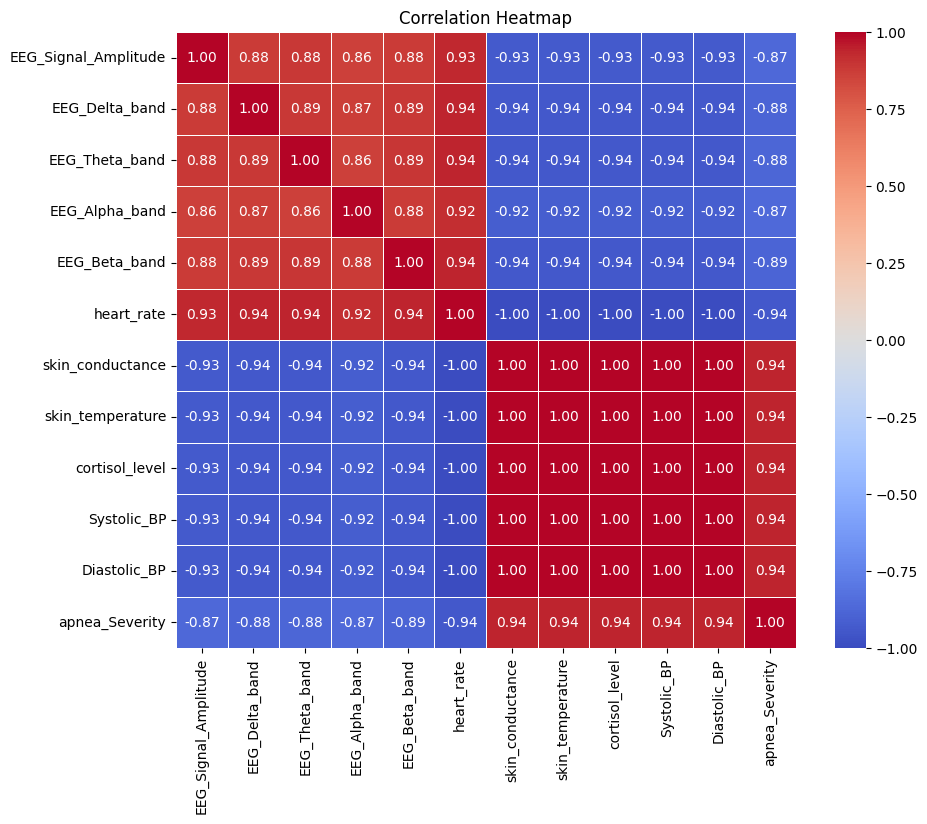

In [31]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
# Split the dataset into features and target
X = df.drop(columns=['apnea_Severity']).values
y = df['apnea_Severity'].values

In [33]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [36]:
# Defineing the neural network model
class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(0.5)  # Adding dropout for regularization

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [37]:
# Instantiate the model
input_size = X_train.shape[1]
output_size = len(df['apnea_Severity'].unique())
model = Classifier(input_size, output_size)

In [38]:
# Define the loss function and optimizer, and adjust the learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjusted learning rate

In [39]:
# Training loop 
num_epochs = 100 
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.8643
Epoch [20/100], Loss: 0.6109
Epoch [30/100], Loss: 0.4788
Epoch [40/100], Loss: 0.4000
Epoch [50/100], Loss: 0.3173
Epoch [60/100], Loss: 0.3046
Epoch [70/100], Loss: 0.2790
Epoch [80/100], Loss: 0.2583
Epoch [90/100], Loss: 0.2497
Epoch [100/100], Loss: 0.2532


In [40]:
 # Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = torch.argmax(model(X_test_tensor), dim=1).numpy()
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9407407407407408


In [41]:
# Make predictions on new data
new_data = [[97, 3.2531, 6.4658, 13.1411, 28.3962, 2, 0, 0, 0, 0, 0]]
new_data_scaled = scaler.transform(new_data)
new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)
with torch.no_grad():
    prediction = torch.argmax(model(new_data_tensor)).item()
    print('Predicted apnea severity:', prediction)

Predicted apnea severity: 0


In [42]:
new_data = [[58, 2.9477, 5.5462, 10.3739, 22.0865, 1, 1, 1, 1, 1, 1]]
new_data_scaled = scaler.transform(new_data)
new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)
with torch.no_grad():
    prediction = torch.argmax(model(new_data_tensor)).item()
    print('Predicted apnea severity:', prediction)

Predicted apnea severity: 1


In [43]:
new_data = [[22, 1.9366, 4.3574, 8.9079, 18.7077, 0, 2, 2, 2, 2, 2]]
new_data_scaled = scaler.transform(new_data)
new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)
with torch.no_grad():
    prediction = torch.argmax(model(new_data_tensor)).item()
    print('Predicted apnea severity:', prediction)

Predicted apnea severity: 2
